In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
TRAINER_RESULTS = {
    "ASIPD": { 
        "file": "shapley/sipd_ppo/meta_game.csv", 
        "shortens": {
            "SIPD/AlwaysCooperate-Default-v0": "Cooperator",
            "SIPD/AlwaysDefect-Default-v0": "Defector",
            "SIPD/TitForTat-Default-v0": "TitForTat",
            "SIPD/WinStayLoseSwitch-Default-v0": "WinLoseSwicth",
            "SIPD/ExtortionateZD-Default-v0": "ZD-Extortioner", 
        }, 
        "type": "players"
    },
    # # "SparseIPD/Ordered/PPO[NR]": "shapley/sipd_ordered_ppo/trainer_nowak_radzik_final.csv",
    # # "SparseIPD/Ordered/PPO[SB]": "shapley/sipd_ordered_ppo/trainer_sanchez_bergantinos_final.csv"
    "MinAtar": {
        "file": "shapley/minatar_dqn/meta_game.csv", 
        "shortens": {
            "MinAtar/Asterix-v0": "Asterix",
            "MinAtar/Breakout-v0": "Breakout",
            "MinAtar/Freeway-v0": "Freeway",
            "MinAtar/Seaquest-v0": "Sequest",
            "MinAtar/SpaceInvaders-v0": "SpaceInvaders"
        }, 
        "type": "games" 
    },
    "MNIST": {
        "file": "shapley/mnist_sgd/meta_game.csv", 
        "shortens": {
            "2": "Digit2",
            "3": "Digit3",
            "4": "Digit4",
            "5": "Digit5",
            "7": "Digit7"
        }, 
        "type": "class"
    },
    "CIFAR10": {
        "file": "shapley/cifar10_sgd/meta_game.csv", 
        "shortens": {
            "1": "Car",
            "3": "Cat",
            "4": "Deer",
            "5": "Dog",
            "6": "Frog",
            "7": "Horse"
        }, 
        "type": "class"
    }
}

In [23]:
def display_meta_game(file: str, title: str, pure_only: bool=True):
    df = pd.read_csv(
        file,
        index_col=0
    )
    # only against pure eval strategies
    # if pure_only:
    #     df = df[df.index]
    plt.figure(figsize=(30,20))
    # plt.figure()
    hm = sns.heatmap(
        df, 
        cmap='Blues', 
        linewidths=0.1, 
        annot=True, 
        fmt='.2f',
        cbar=False,
        vmin=df.min().min(), vmax=df.max().max(),
    )
    hm.set(xlabel="$EVAL$", ylabel="$SHAPLEY$", title=title)
    # hm.autoscale(True)
    hm.tick_params(top=False, bottom=True,
                labeltop=False, labelbottom=True)
    plt.setp(hm.get_xticklabels(), rotation=90, ha="right",
            rotation_mode="anchor")
    plt.tight_layout()

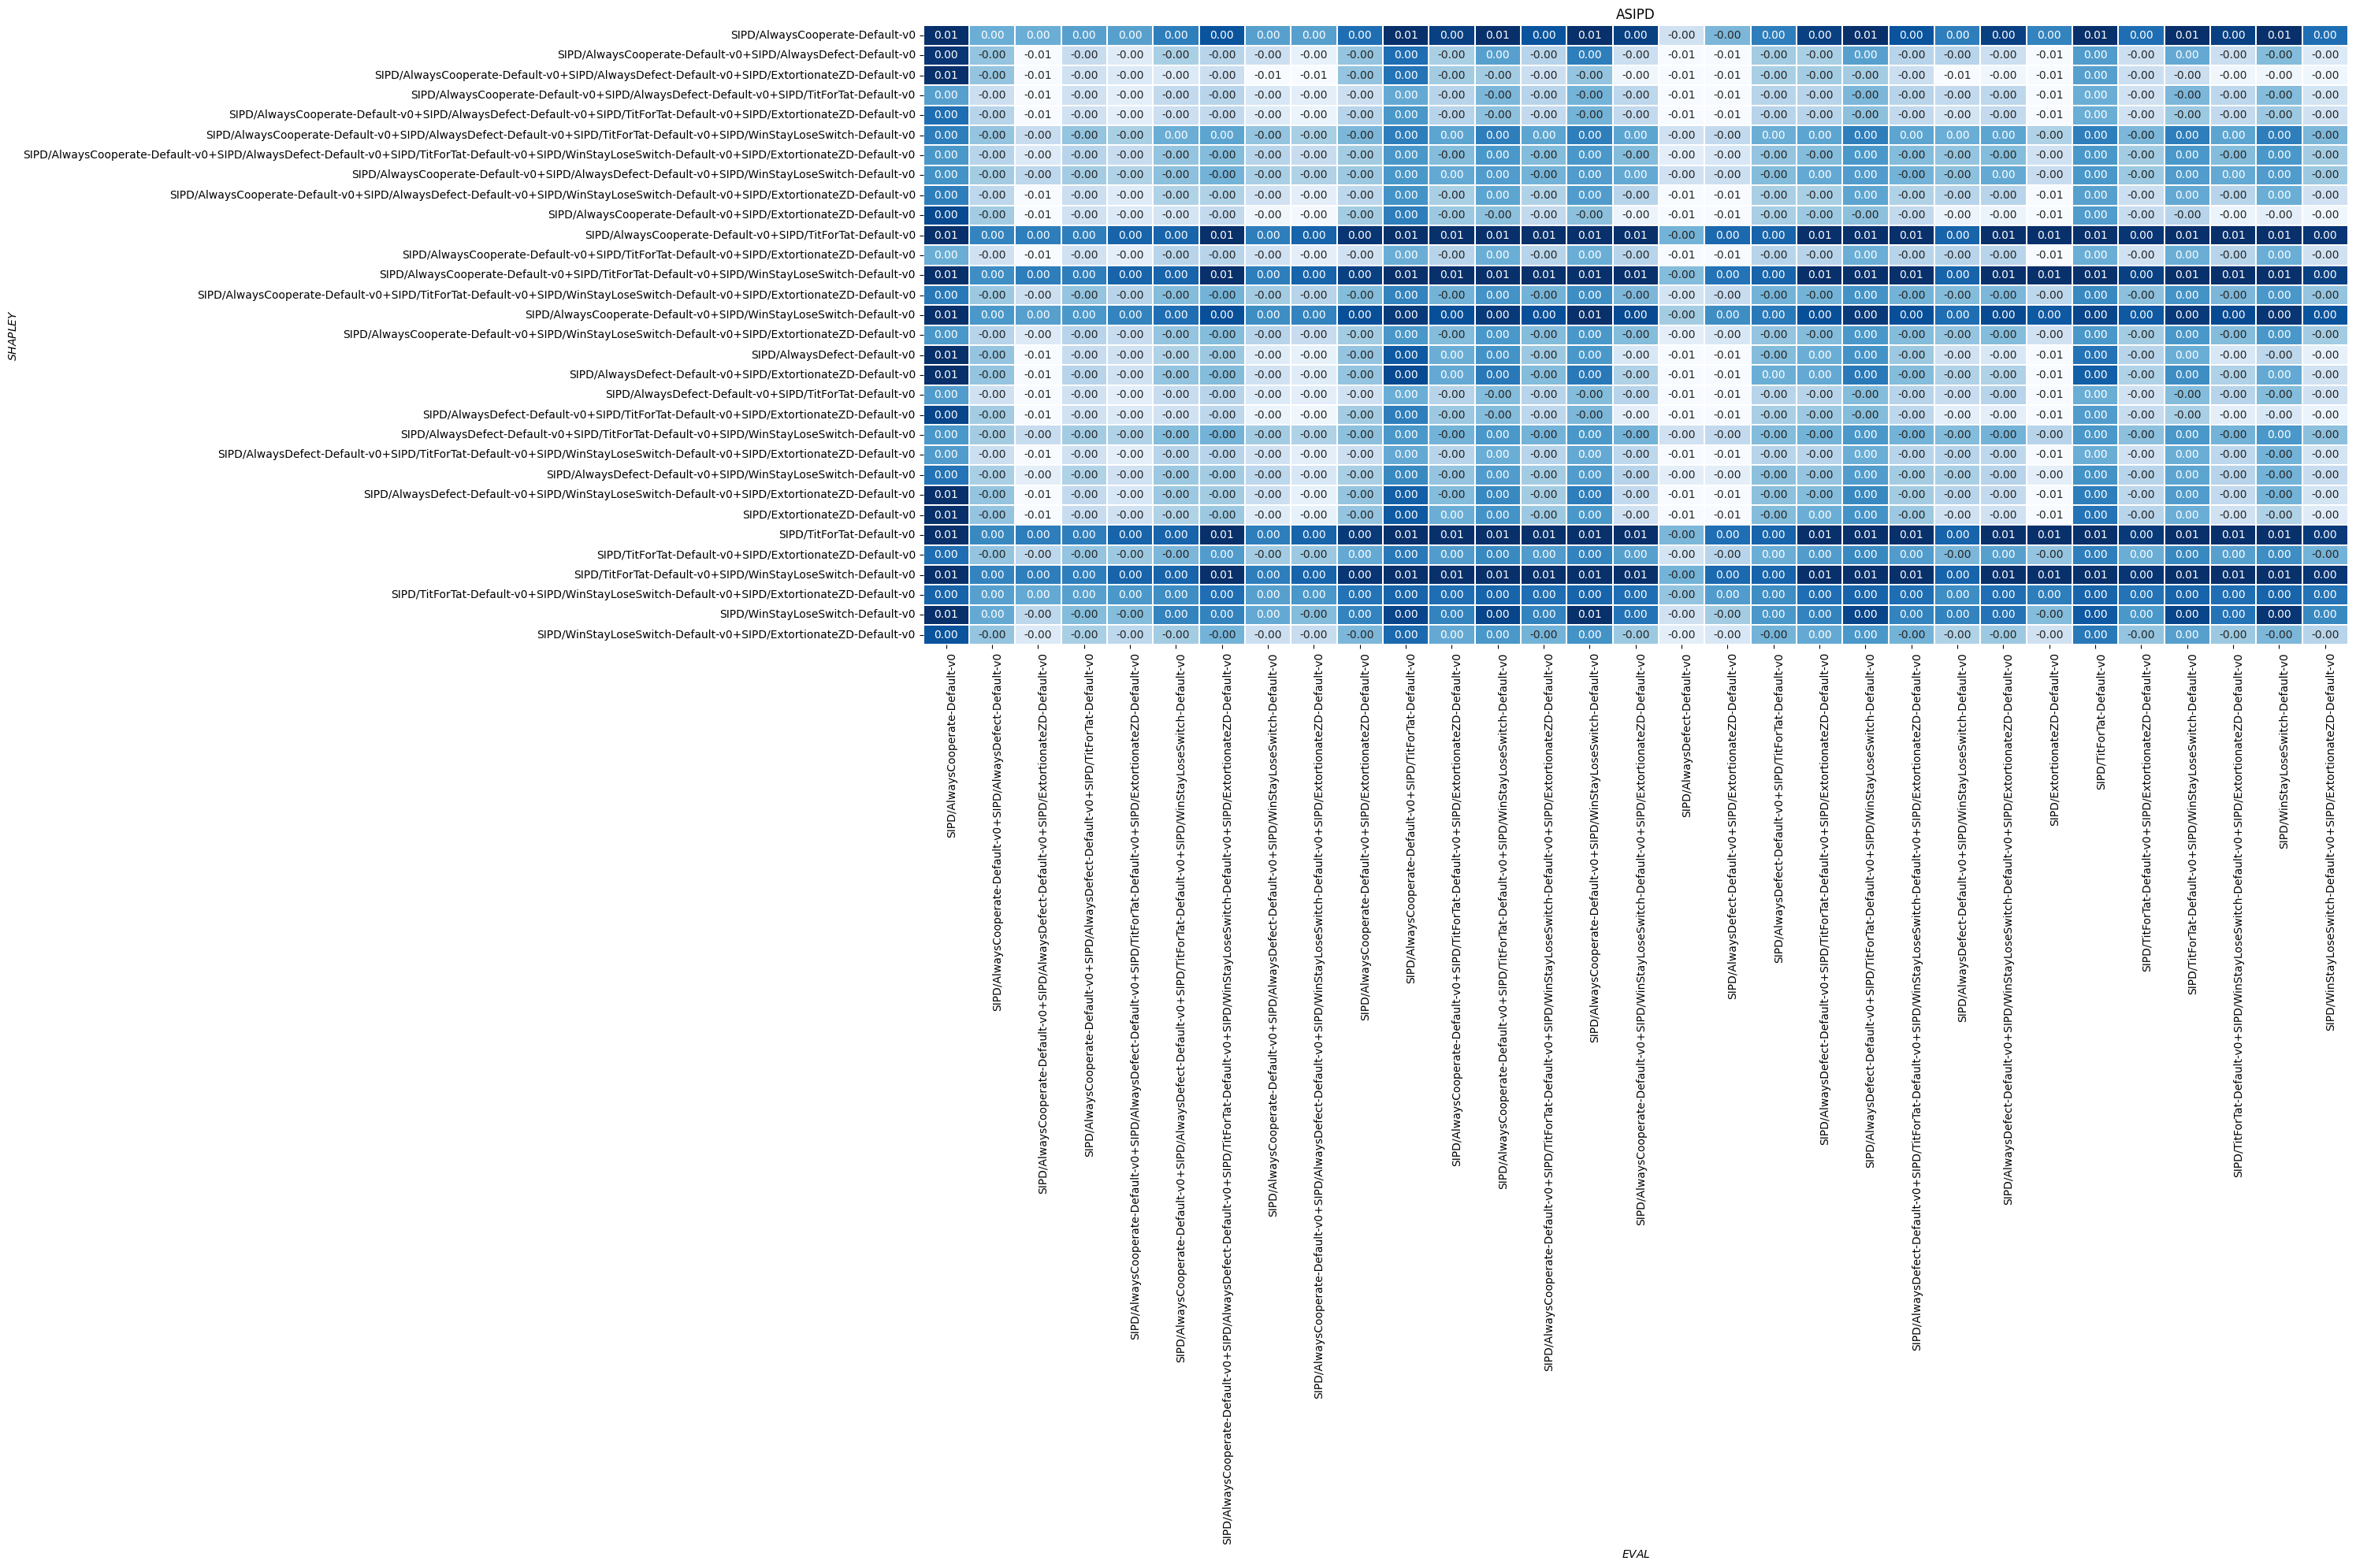

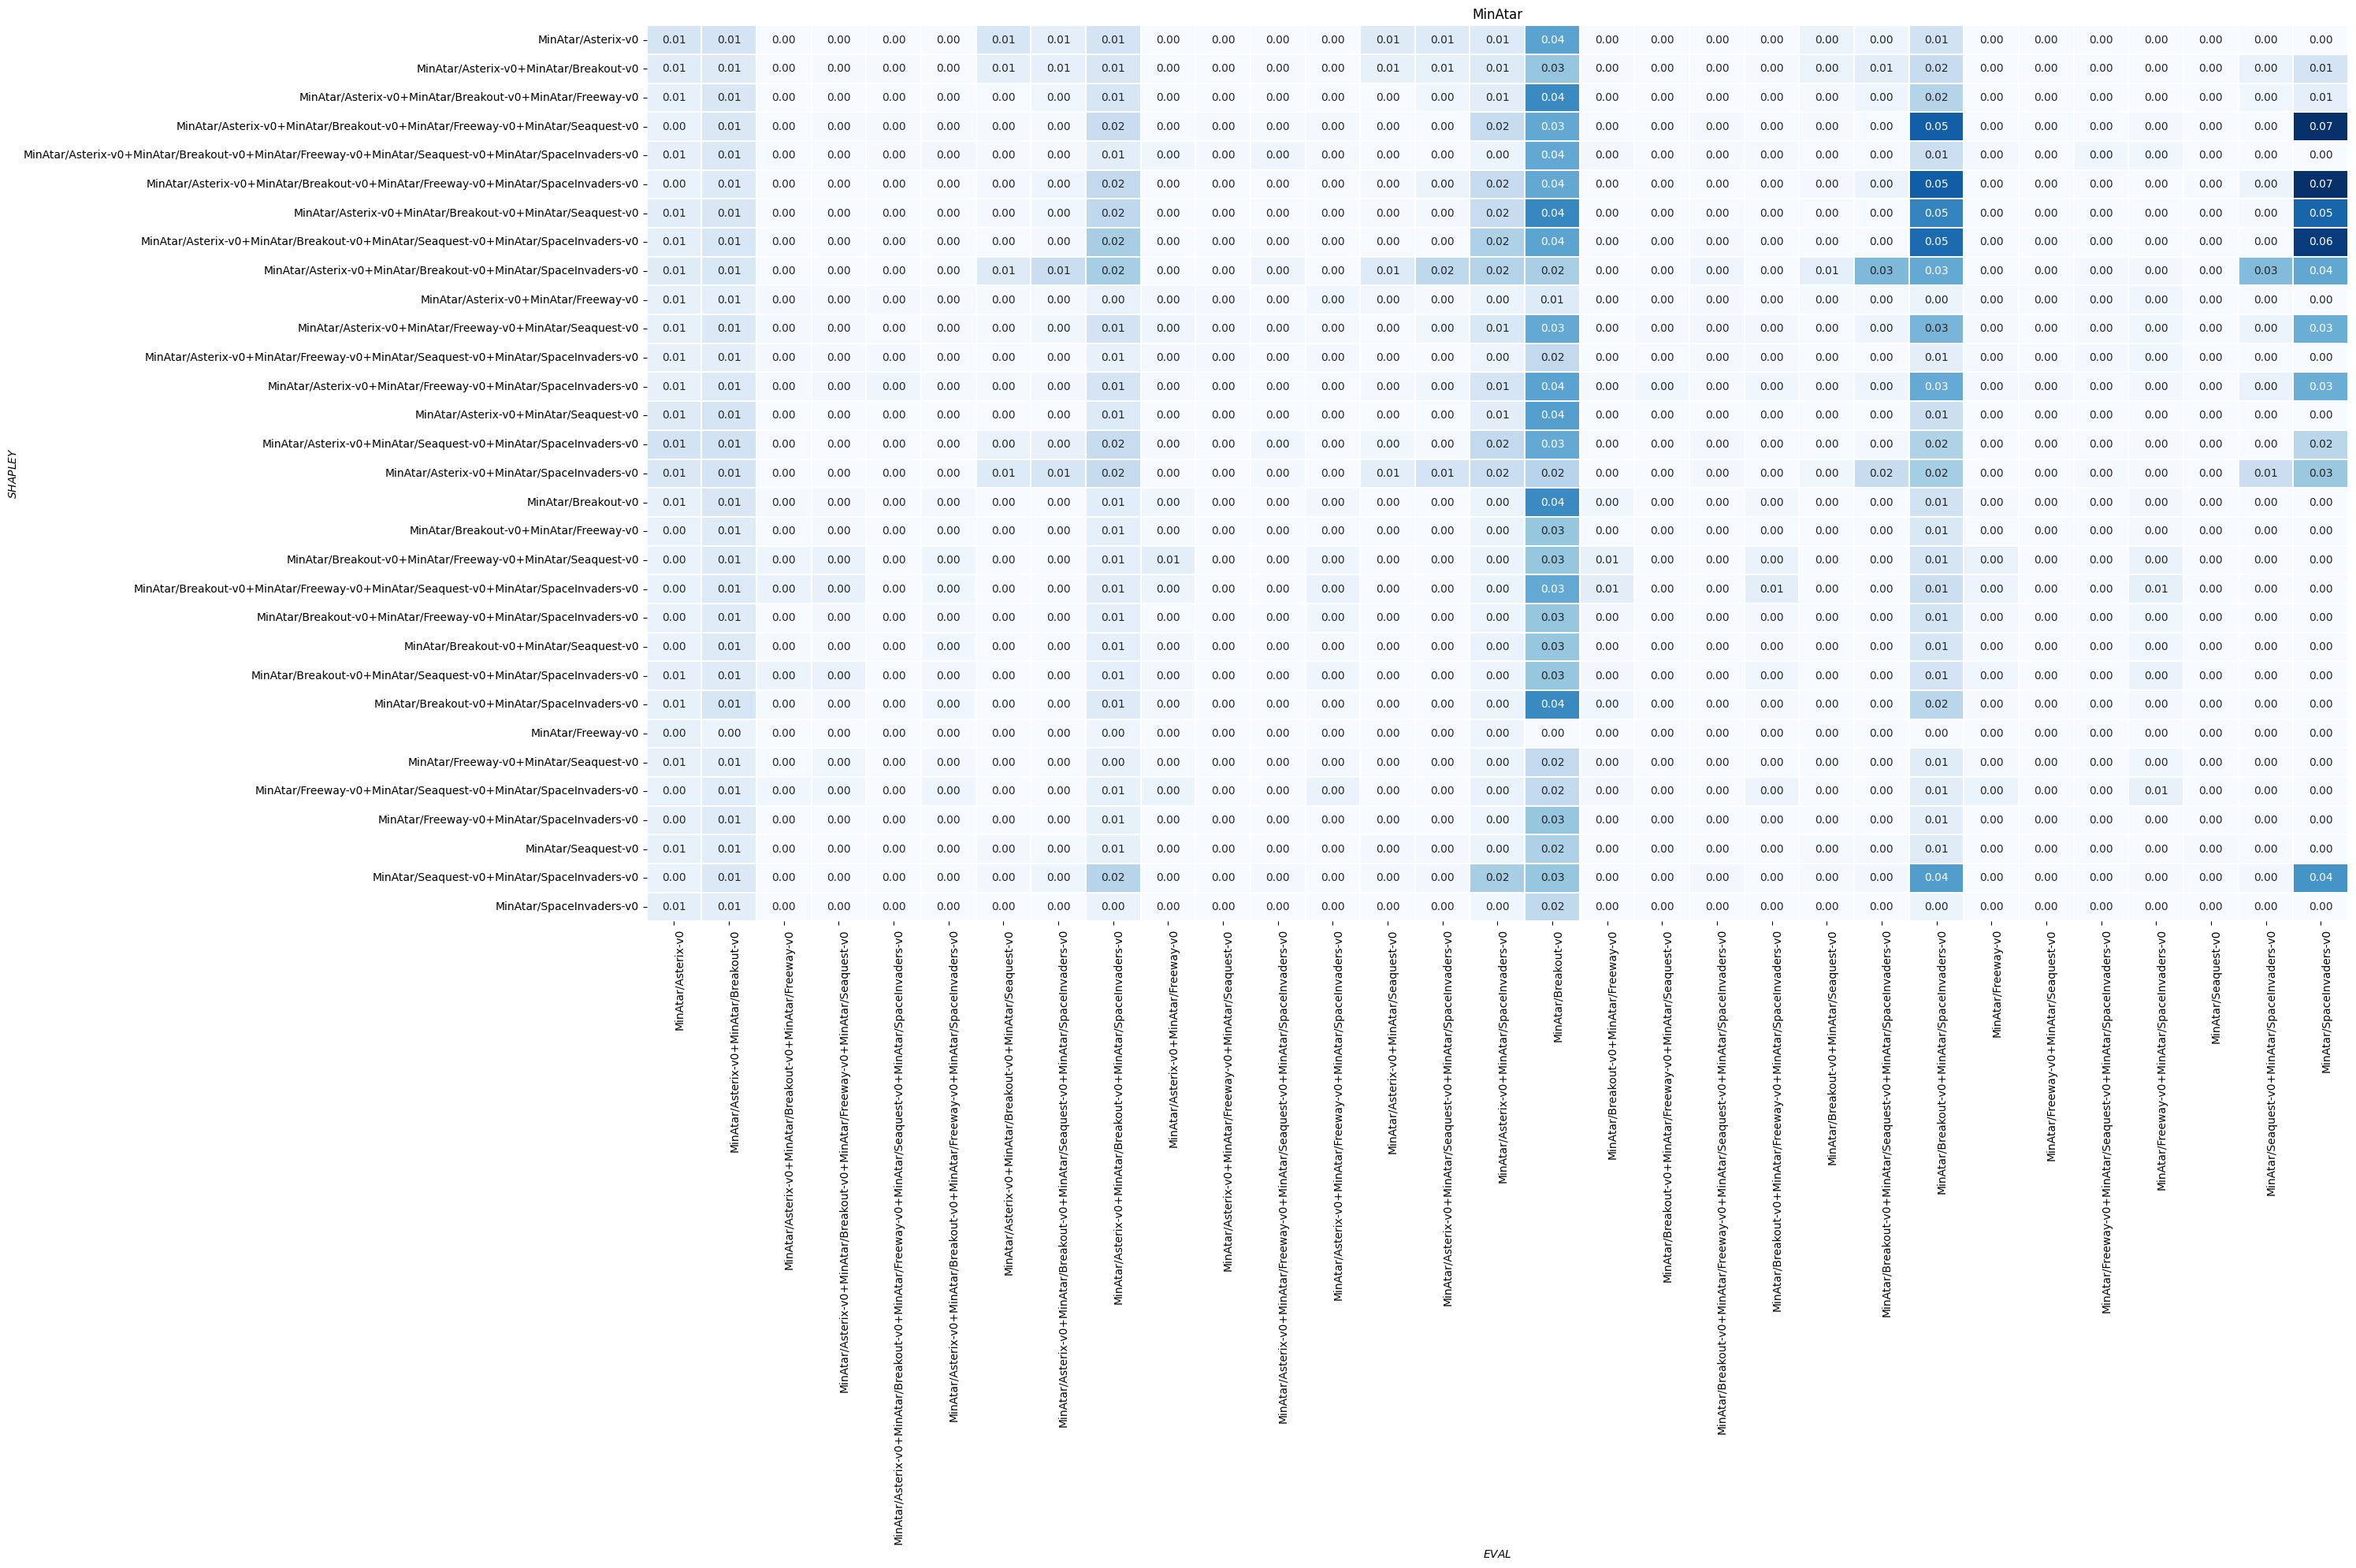

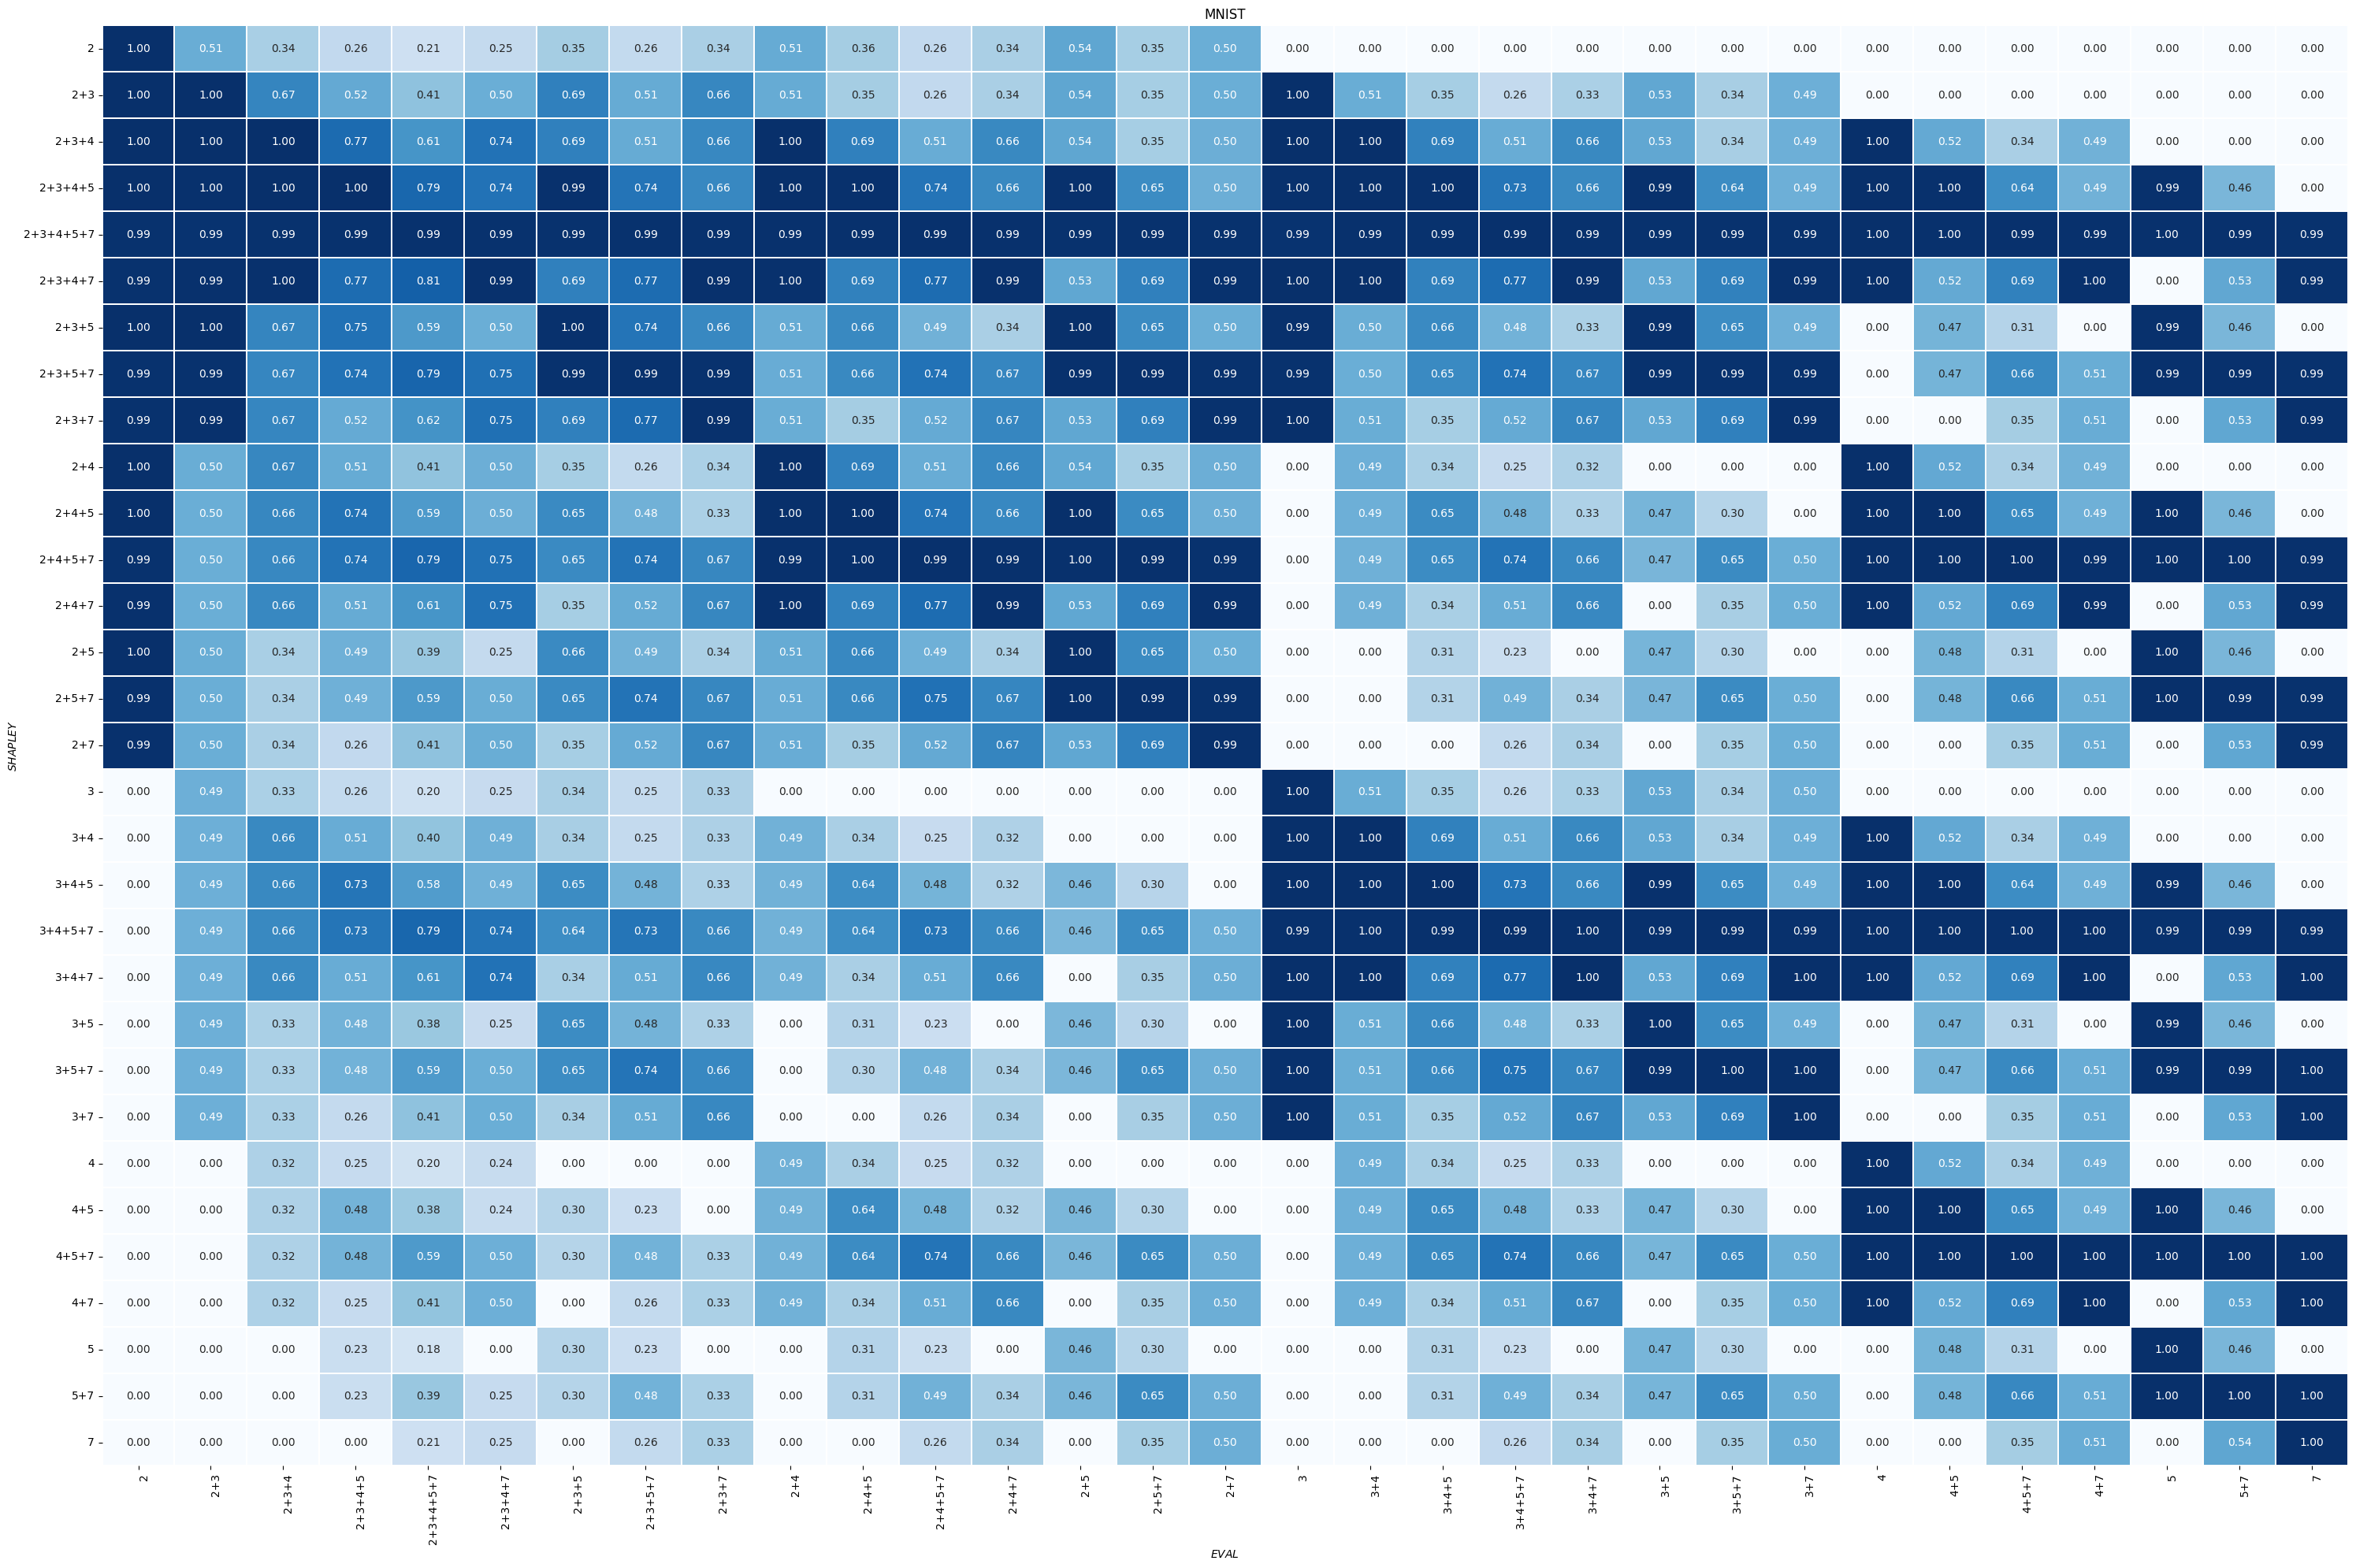

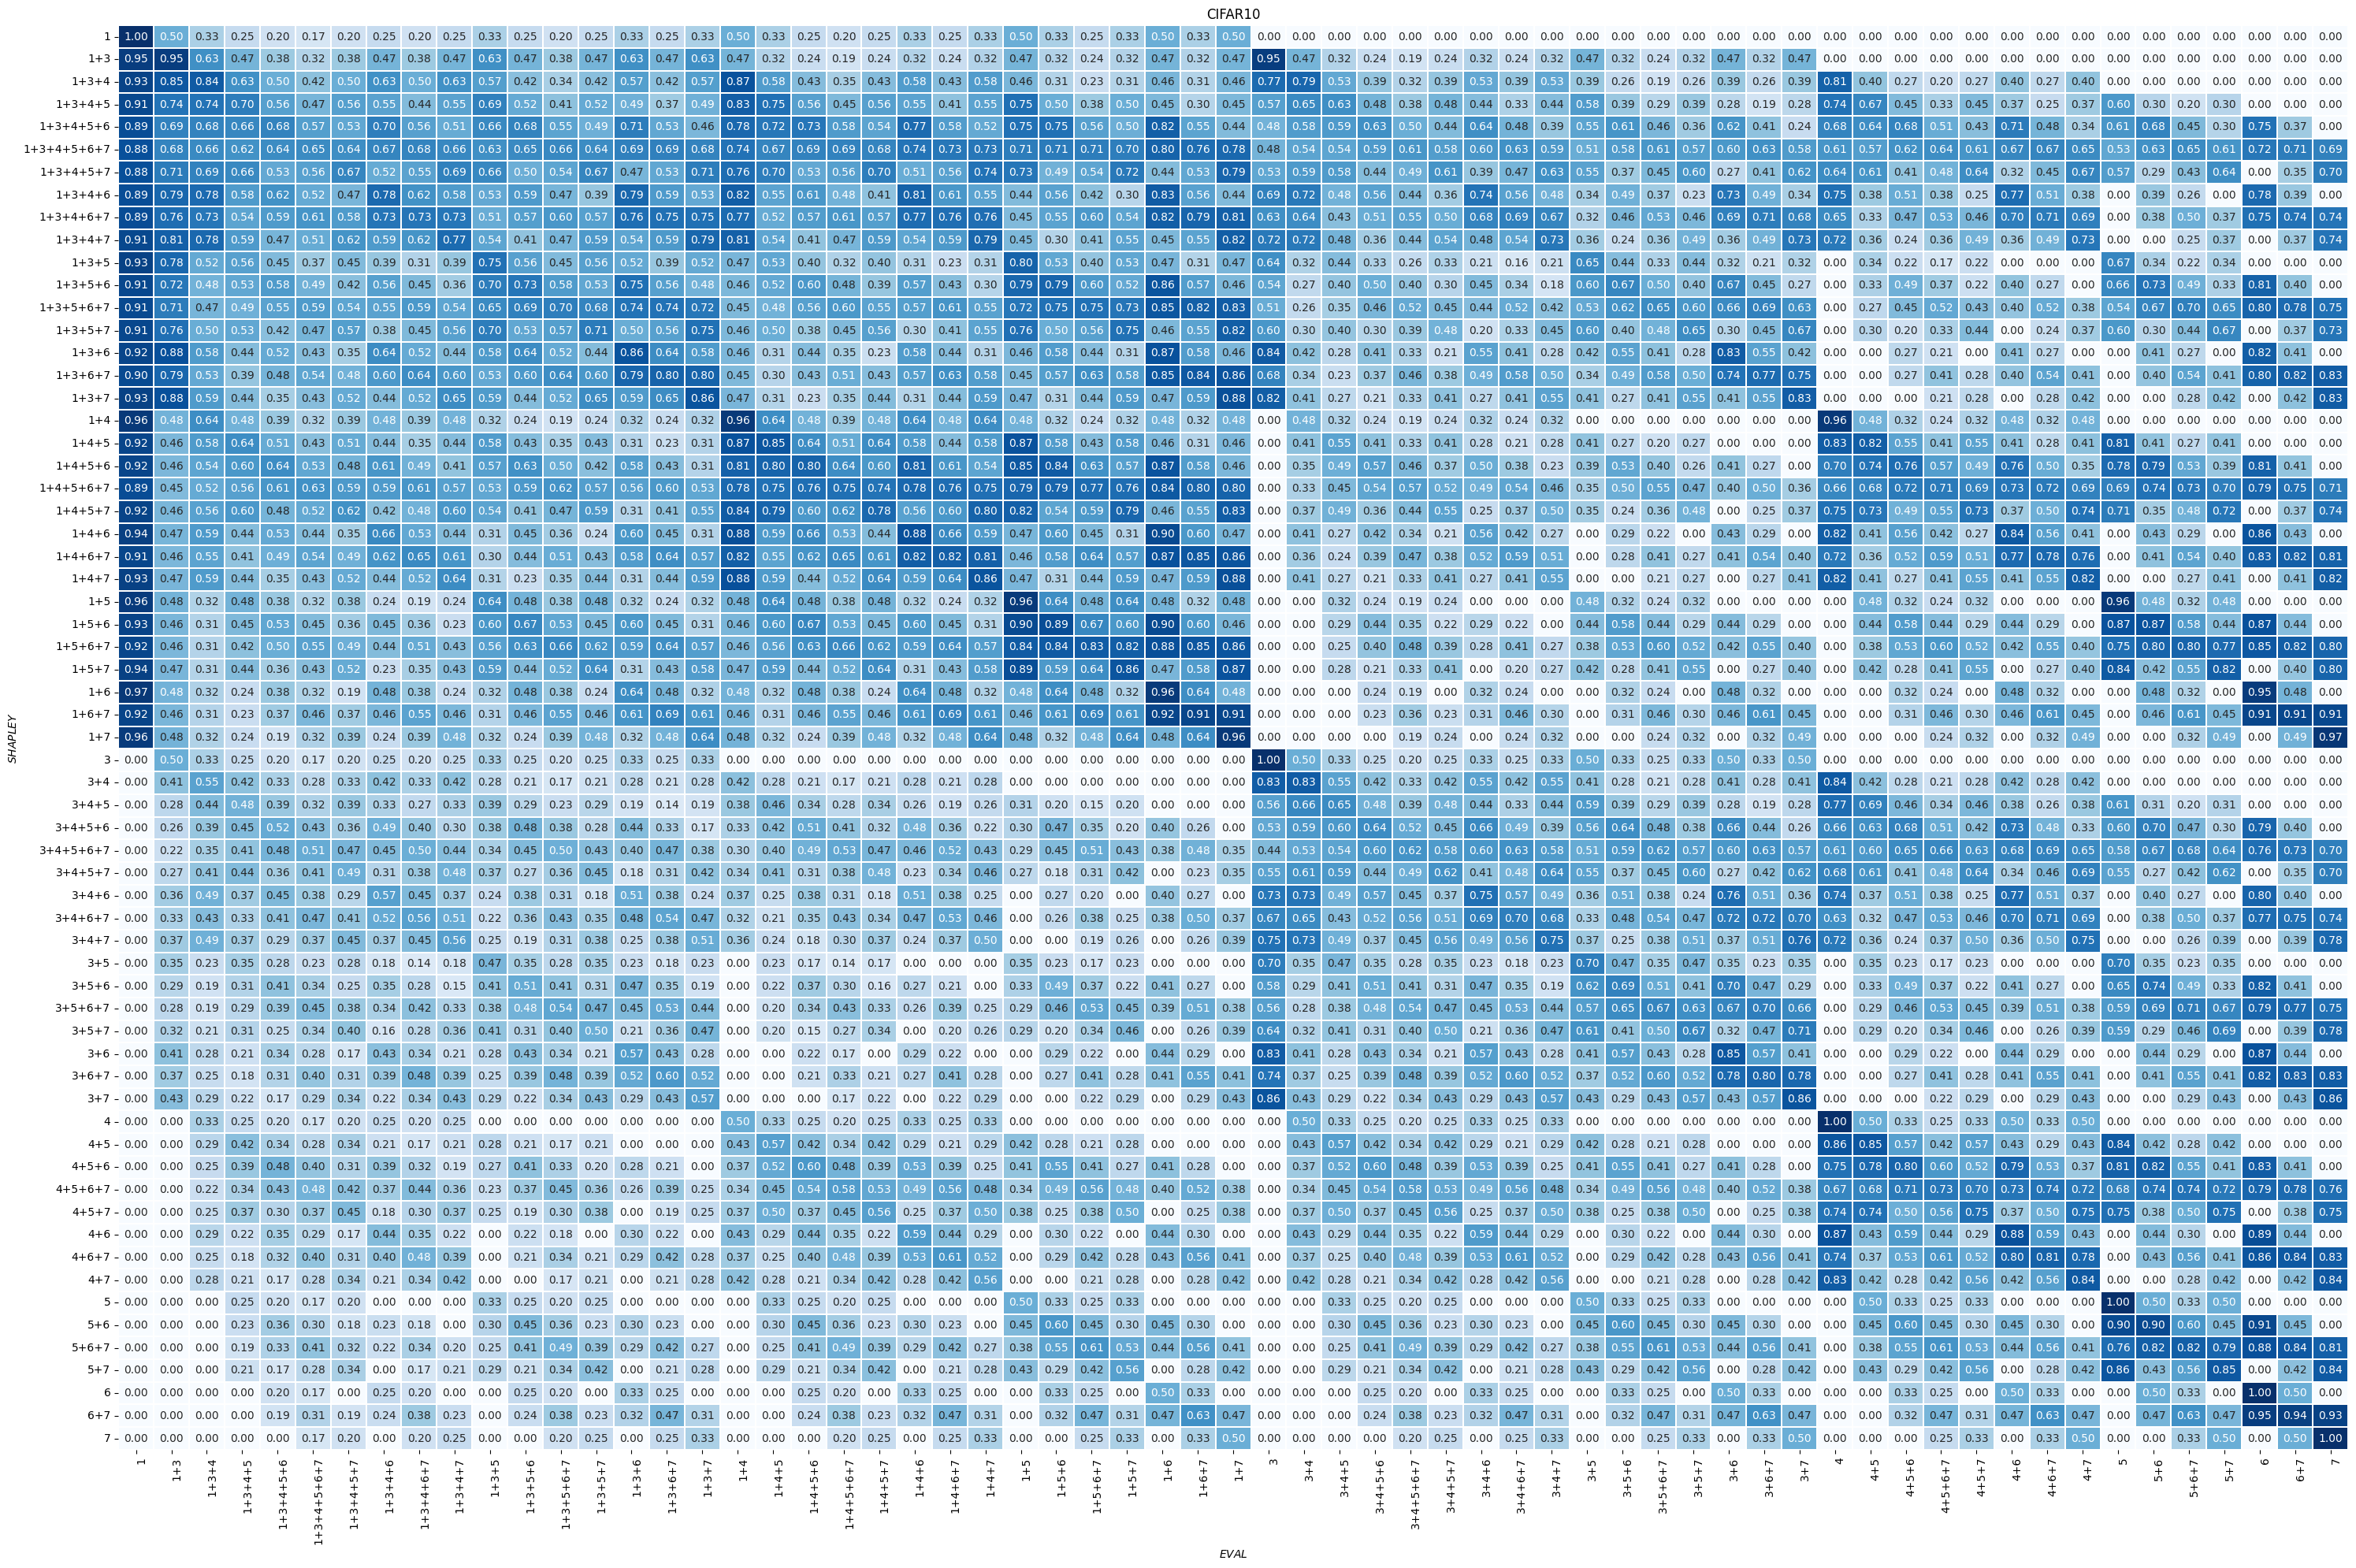

In [24]:
for result in TRAINER_RESULTS:
    display_meta_game(TRAINER_RESULTS[result]['file'], result)